# Ass-5 [Top Industries]

Given File 'startup_funding.csv'
Problem Statement :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.
Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . . 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv", parse_dates = ['Date'])
df = data.copy()


In [51]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [58]:
# handle missing values in IndustryVertical
df.drop(df.index[df.IndustryVertical.isnull()], inplace = True)


In [59]:
# Ecommerce is the right word in IndustryVertical
df.loc[df.IndustryVertical == 'ecommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'ECommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'eCommerce', 'IndustryVertical'] = 'Ecommerce'



industry = []
for i in df.IndustryVertical:
    industry.append(i)

In [60]:
# replace NaN values with 0 in amount column
df.loc[df.AmountInUSD.isnull(), 'AmountInUSD'] = '0'

amount = []
for i in df.AmountInUSD:
    amount.append(i)
#handle space
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
    

In [61]:
np_amount = np.array(amount, dtype = 'int64')
np_industry = np.array(industry)

In [62]:
Dic = {}
for i in range(len(np_industry)):
    if np_industry[i] in Dic:
        Dic[np_industry[i]] += np_amount[i]
    else:
        Dic[np_industry[i]] = np_amount[i]

In [66]:
x = list(Dic.keys())
y = list(Dic.values())
np_x = np.array(x)
np_y = np.array(y)

# sort np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

In [67]:
np_x = np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1:len(np_y)-1-5:-1]

In [68]:
print(np_x)
print(np_y)

['Ecommerce' 'Consumer Internet' 'Technology' 'Online Marketplace'
 'E-Commerce & M-Commerce platform']
[4281189608 3797089000 1103593500  700000000  680000000]


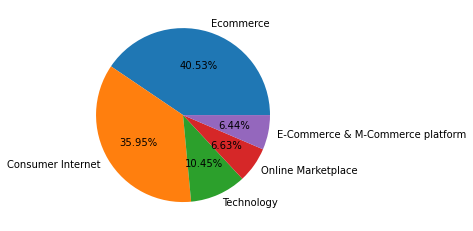

In [70]:
plt.pie(np_y, labels = np_x, autopct = '%.2f%%')
plt.show()

In [72]:
for i in range(len(np_x)):
    print(np_x[i], format(np_y[i]*100/sum(np_y), '.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


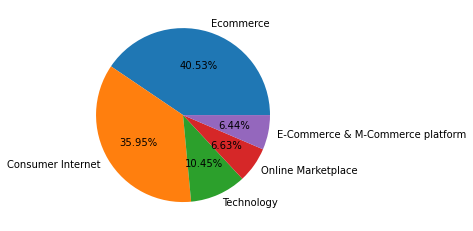

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv", parse_dates = ['Date'])
df = data.copy()

# handle missing values in IndustryVertical
df.drop(df.index[df.IndustryVertical.isnull()], inplace = True)

# Ecommerce is the right word in IndustryVertical
df.loc[df.IndustryVertical == 'ecommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'ECommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'eCommerce', 'IndustryVertical'] = 'Ecommerce'

industry = []
for i in df.IndustryVertical:
    industry.append(i)
    
# replace NaN values with 0 in amount column
df.loc[df.AmountInUSD.isnull(), 'AmountInUSD'] = '0'

amount = []
for i in df.AmountInUSD:
    amount.append(i)
#handle space
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
    
np_amount = np.array(amount, dtype = 'int64')
np_industry = np.array(industry)

Dic = {}
for i in range(len(np_industry)):
    if np_industry[i] in Dic:
        Dic[np_industry[i]] += np_amount[i]
    else:
        Dic[np_industry[i]] = np_amount[i]
        
x = list(Dic.keys())
y = list(Dic.values())
np_x = np.array(x)
np_y = np.array(y)

# sort np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_x = np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.pie(np_y, labels = np_x, autopct = '%.2f%%')
plt.show()

for i in range(len(np_x)):
    print(np_x[i], format(np_y[i]*100/sum(np_y), '.2f'))

# Ass-6 [Top startups]


Given File 'startup_funding.csv'
Problem Statement :
Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. 

There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1
startup2
startup3
. . . 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv", parse_dates = ['Date'])
df = data.copy()

In [72]:
# find NaN values in AmountInUSD column and fill with '0'
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount = np.array(df.AmountInUSD)
np_startup = np.array(df.StartupName)

#handle space
for i in range(len(np_amount)):
    np_amount[i] = ''.join(np_amount[i].split(','))
    
np_amount = np.array(np_amount, dtype = 'int64')

In [81]:
# correct spelling mistake in startup
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
        

In [82]:
Dict = {}
for i in range(len(np_amount)):
    if np_startup[i] in Dict.keys():
        Dict[np_startup[i]] += np_amount[i]
    else:
        Dict[np_startup[i]] = np_amount[i]

In [83]:
x = []
y = []
for val in Dict:
    x.append(val)
    y.append(Dict[val])

np_x = np.array(x)
np_y = np.array(y)

In [84]:
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

In [86]:
np_x = np_x[len(np_x)-1: len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1: len(np_y)-1-5:-1]

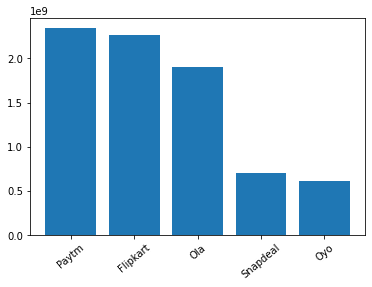

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv", parse_dates = ['Date'])
df = data.copy()
df.head()

#correct spelling mistake in startup
np_startup = np.array(df.StartupName)

for i in range(len(np_startup)):
    
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
        
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
        
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
        
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
        

# filling missing values in AmountInUSD with '0'
df.AmountInUSD.loc[df.AmountInUSD.isnull()] = '0'

np_amount = np.array(df.AmountInUSD)
for i in range(len(np_amount)):
    np_amount[i] = ''.join(np_amount[i].split(','))
    
np_amount = np.array(np_amount, dtype = 'int64')

#create dict using np_staatrup as keys and np_amount as values
Dict = {}
for i in range(len(np_amount)):
    if np_startup[i] in Dict:
        Dict[np_startup[i]] += np_amount[i]
    else:
        Dict[np_startup[i]] = np_amount[i]

x = list(Dict.keys())
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

#sort np_x arr using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

#find top 5 most startup
np_x = np_x[len(np_x)-1: len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1: len(np_y)-1-5:-1]

#create bar chart
plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i])